# Leading Model Evaluation using Bipartite and Vector

This is an overall evaluation using both bipartite and vector evaluation for ChatGPT, Claude, and Gemma

### Imports

In [1]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

from humor.vector_similarity_metric import vector_similarity_metric
from humor.bipartite_metric import bipartite_metric

/home/ada/humor/.venv/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
gemma = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
chatgpt = pd.read_csv("/home/ada/humor/data/stand_up_dataset/Chat_GPT_results - Sheet1.csv")
claude = pd.read_csv("/home/ada/humor/data/stand_up_dataset/Claude_results - Sheet1.csv")
gemma_llm = gemma.loc[gemma["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Russell_Peters", "Ali_Wong", "Hasan_Minhaj", "Chelsea_Peretti", "Trevor_Noah_2", "Joe_List", "Anthony_Jeselnik", "Sam_Morril_2"])]
llm_gt = ground_truth.loc[ground_truth["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Russell_Peters", "Ali_Wong", "Hasan_Minhaj", "Chelsea_Peretti", "Trevor_Noah_2", "Joe_List", "Anthony_Jeselnik", "Sam_Morril_2"])]

### Experiment

In [3]:
print("Bipartite\n")
gemma_llm_bimetric = bipartite_metric(gemma_llm, llm_gt)
print("Gemma: ", gemma_llm_bimetric.select_dtypes(include='number').mean())

chatgpt_bimetric = bipartite_metric(chatgpt, llm_gt)
print("ChatGPT:", chatgpt_bimetric.select_dtypes(include='number').mean())

claude_bimetric = bipartite_metric(claude, llm_gt)
print("Claude:", claude_bimetric.select_dtypes(include='number').mean())

print("\nSentence Embedding\n")
gemma_llm_vec_metric = vector_similarity_metric(gemma_llm, llm_gt)
print("Gemma: ", gemma_llm_vec_metric.select_dtypes(include='number').mean())

chatgpt_vec_metric = vector_similarity_metric(chatgpt, llm_gt)
print("ChatGPT:", chatgpt_vec_metric.select_dtypes(include='number').mean())

claude_vec_metric = vector_similarity_metric(claude, llm_gt)
print("Claude:", claude_vec_metric.select_dtypes(include='number').mean())

Bipartite

Gemma:  score    27.079583
dtype: float64
ChatGPT: score    50.261667
dtype: float64
Claude: score    54.257619
dtype: float64

Sentence Embedding

Gemma:  score    27.72568
dtype: float64
ChatGPT: score    58.549092
dtype: float64
Claude: score    58.384588
dtype: float64


<Figure size 500x500 with 0 Axes>

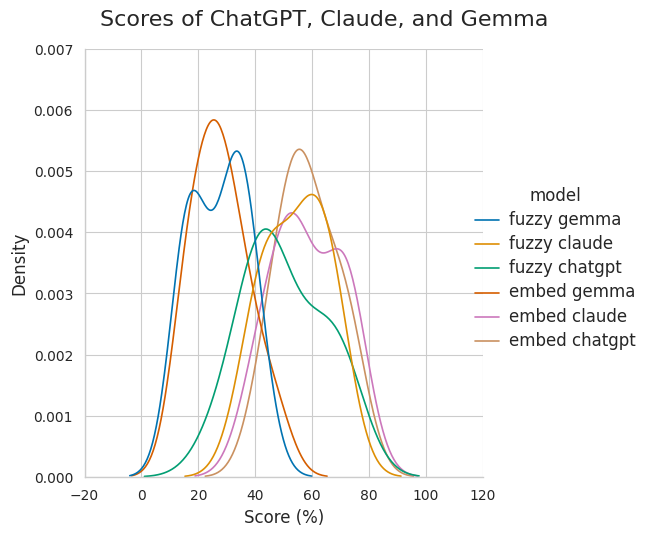

In [4]:
f_gemma = gemma_llm_bimetric.assign(model = "fuzzy gemma")
f_claude = claude_bimetric.assign(model="fuzzy claude") 
f_chatgpt = chatgpt_bimetric.assign(model="fuzzy chatgpt")
e_gemma = gemma_llm_vec_metric.assign(model = "embed gemma")
e_claude = claude_vec_metric.assign(model="embed claude") 
e_chatgpt = chatgpt_vec_metric.assign(model="embed chatgpt")
df = pd.concat([f_gemma, f_claude, f_chatgpt, e_gemma, e_claude, e_chatgpt]).reset_index(drop=True)

sns.set_style("whitegrid")
sns.set_context("paper")
plt.figure(figsize=(5, 5))  
sns.set_palette("colorblind")

plot = sns.displot(df, x="score", hue="model", kind="kde")

plot.fig.suptitle("Scores of ChatGPT, Claude, and Gemma", fontsize=16, y=1.05)  
plot.set_axis_labels("Score (%)", "Density", fontsize=12)
plot.set_xticklabels(fontsize=10) 
plot.set_yticklabels(fontsize=10) 

plot._legend.get_title().set_fontsize(12) 
for text in plot._legend.texts:
    text.set_fontsize(12) 
    
plot.savefig("experiment_03.png", dpi=300)
plt.show()